In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")

In [4]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

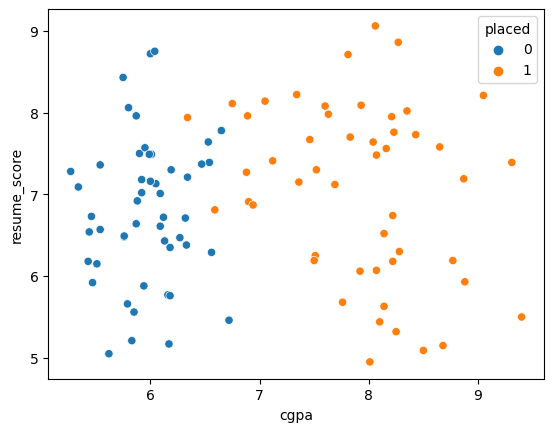

In [7]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()


In [10]:
p.fit(X,y)

Perceptron()

In [11]:
p.coef_

array([[ 40.26, -36.  ]])

In [12]:
p.intercept_

array([-25.])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01


/home/yash/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

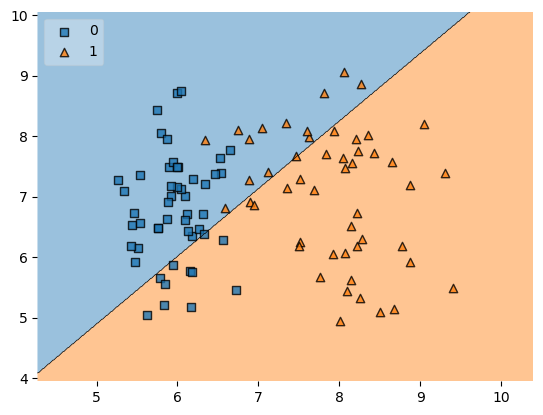

In [15]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf = p,legend = 2)

# Perceptron Trick

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

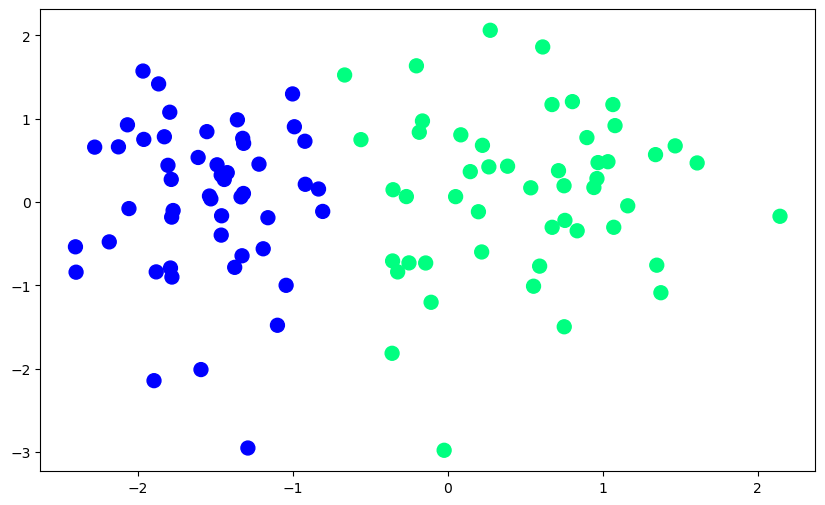

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap = 'winter',s=100)

In [6]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [11]:
def step(z):
    return 1 if z>0 else 0

In [13]:
intercept_,coef_ = perceptron(X,y)

print(coef_)
print(intercept_)

[1.29236172 0.08678971]
0.9


In [16]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

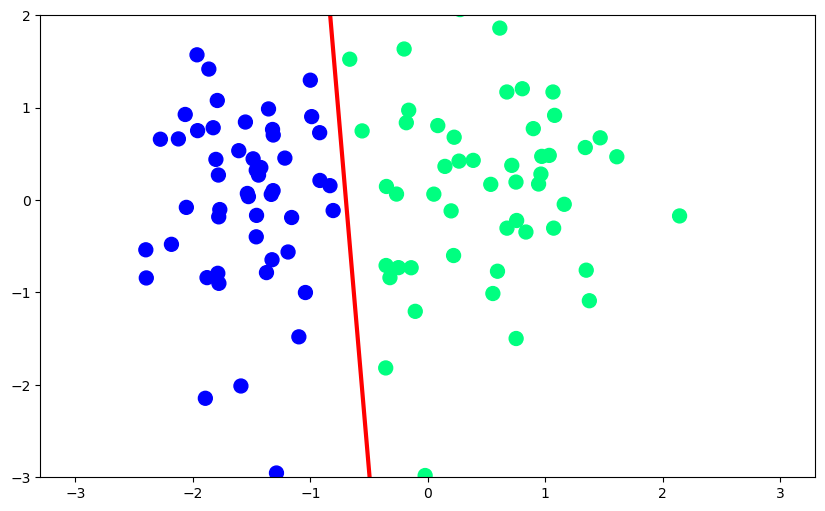

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)